### Imports

In [2]:
import sys
mypath = "/home/basia/Documents/spectroscopy/magnetstein"
sys.path.insert(0, mypath)

In [3]:
import numpy as np
import pandas as pd
import os
from masserstein import NMRSpectrum, estimate_proportions
import matplotlib.pyplot as plt
import pulp
import pickle
import itertools
import matplotlib.pyplot as plt

### Finding all values of kappa, kappa_th

In [11]:
results_dir = '/home/basia/Documents/reactions_project/results/sacharose_1000/comparing_with_first/unknown_substrats/'

In [12]:
def convert(txt):
    k = float(txt)
    if k%1 ==0:
        return int(k)
    return k

In [13]:
all_kappas = []
all_kappas_th = []
for file in os.listdir(results_dir):
    if file.startswith('noise_proportions_in_times'):
        kappa = convert(file.split('_')[4])
        all_kappas.append(kappa)
        kappa_th = convert(file.split('_')[5][:-4])
        all_kappas_th.append(kappa_th)
        
all_kappas = sorted(list(set(all_kappas)))
all_kappas_th = sorted(list(set(all_kappas_th)))

In [15]:
kappas_to_remove = [0.22, 0.25]
kappas_th_to_remove = [0.22, 0.25]

In [16]:
all_kappas = sorted(list(set(all_kappas) - set(kappas_to_remove)))
all_kappas_th = sorted(list(set(all_kappas_th) - set(kappas_th_to_remove)))


### Reading results for different values of kappa, kappa_th

In [17]:
results_dict = {}

for kappa in all_kappas:
    for kappa_th in all_kappas_th:
        try:
            with open(results_dir + 'proportions_in_times_' +
                                  str(kappa)+'_'+str(kappa_th)+'.pkl', 'rb') as f:
                y = pickle.load(f)
                y = np.array(y).reshape(-1,1)
                results_dict[(kappa, kappa_th)] = y
        except FileNotFoundError:
            results_dict[(kappa, kappa_th)] = None

### Visualising results

/tmp/ipykernel_5511/3724061270.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  slope, intercept = np.linalg.lstsq(t_and_ones, y)[0]


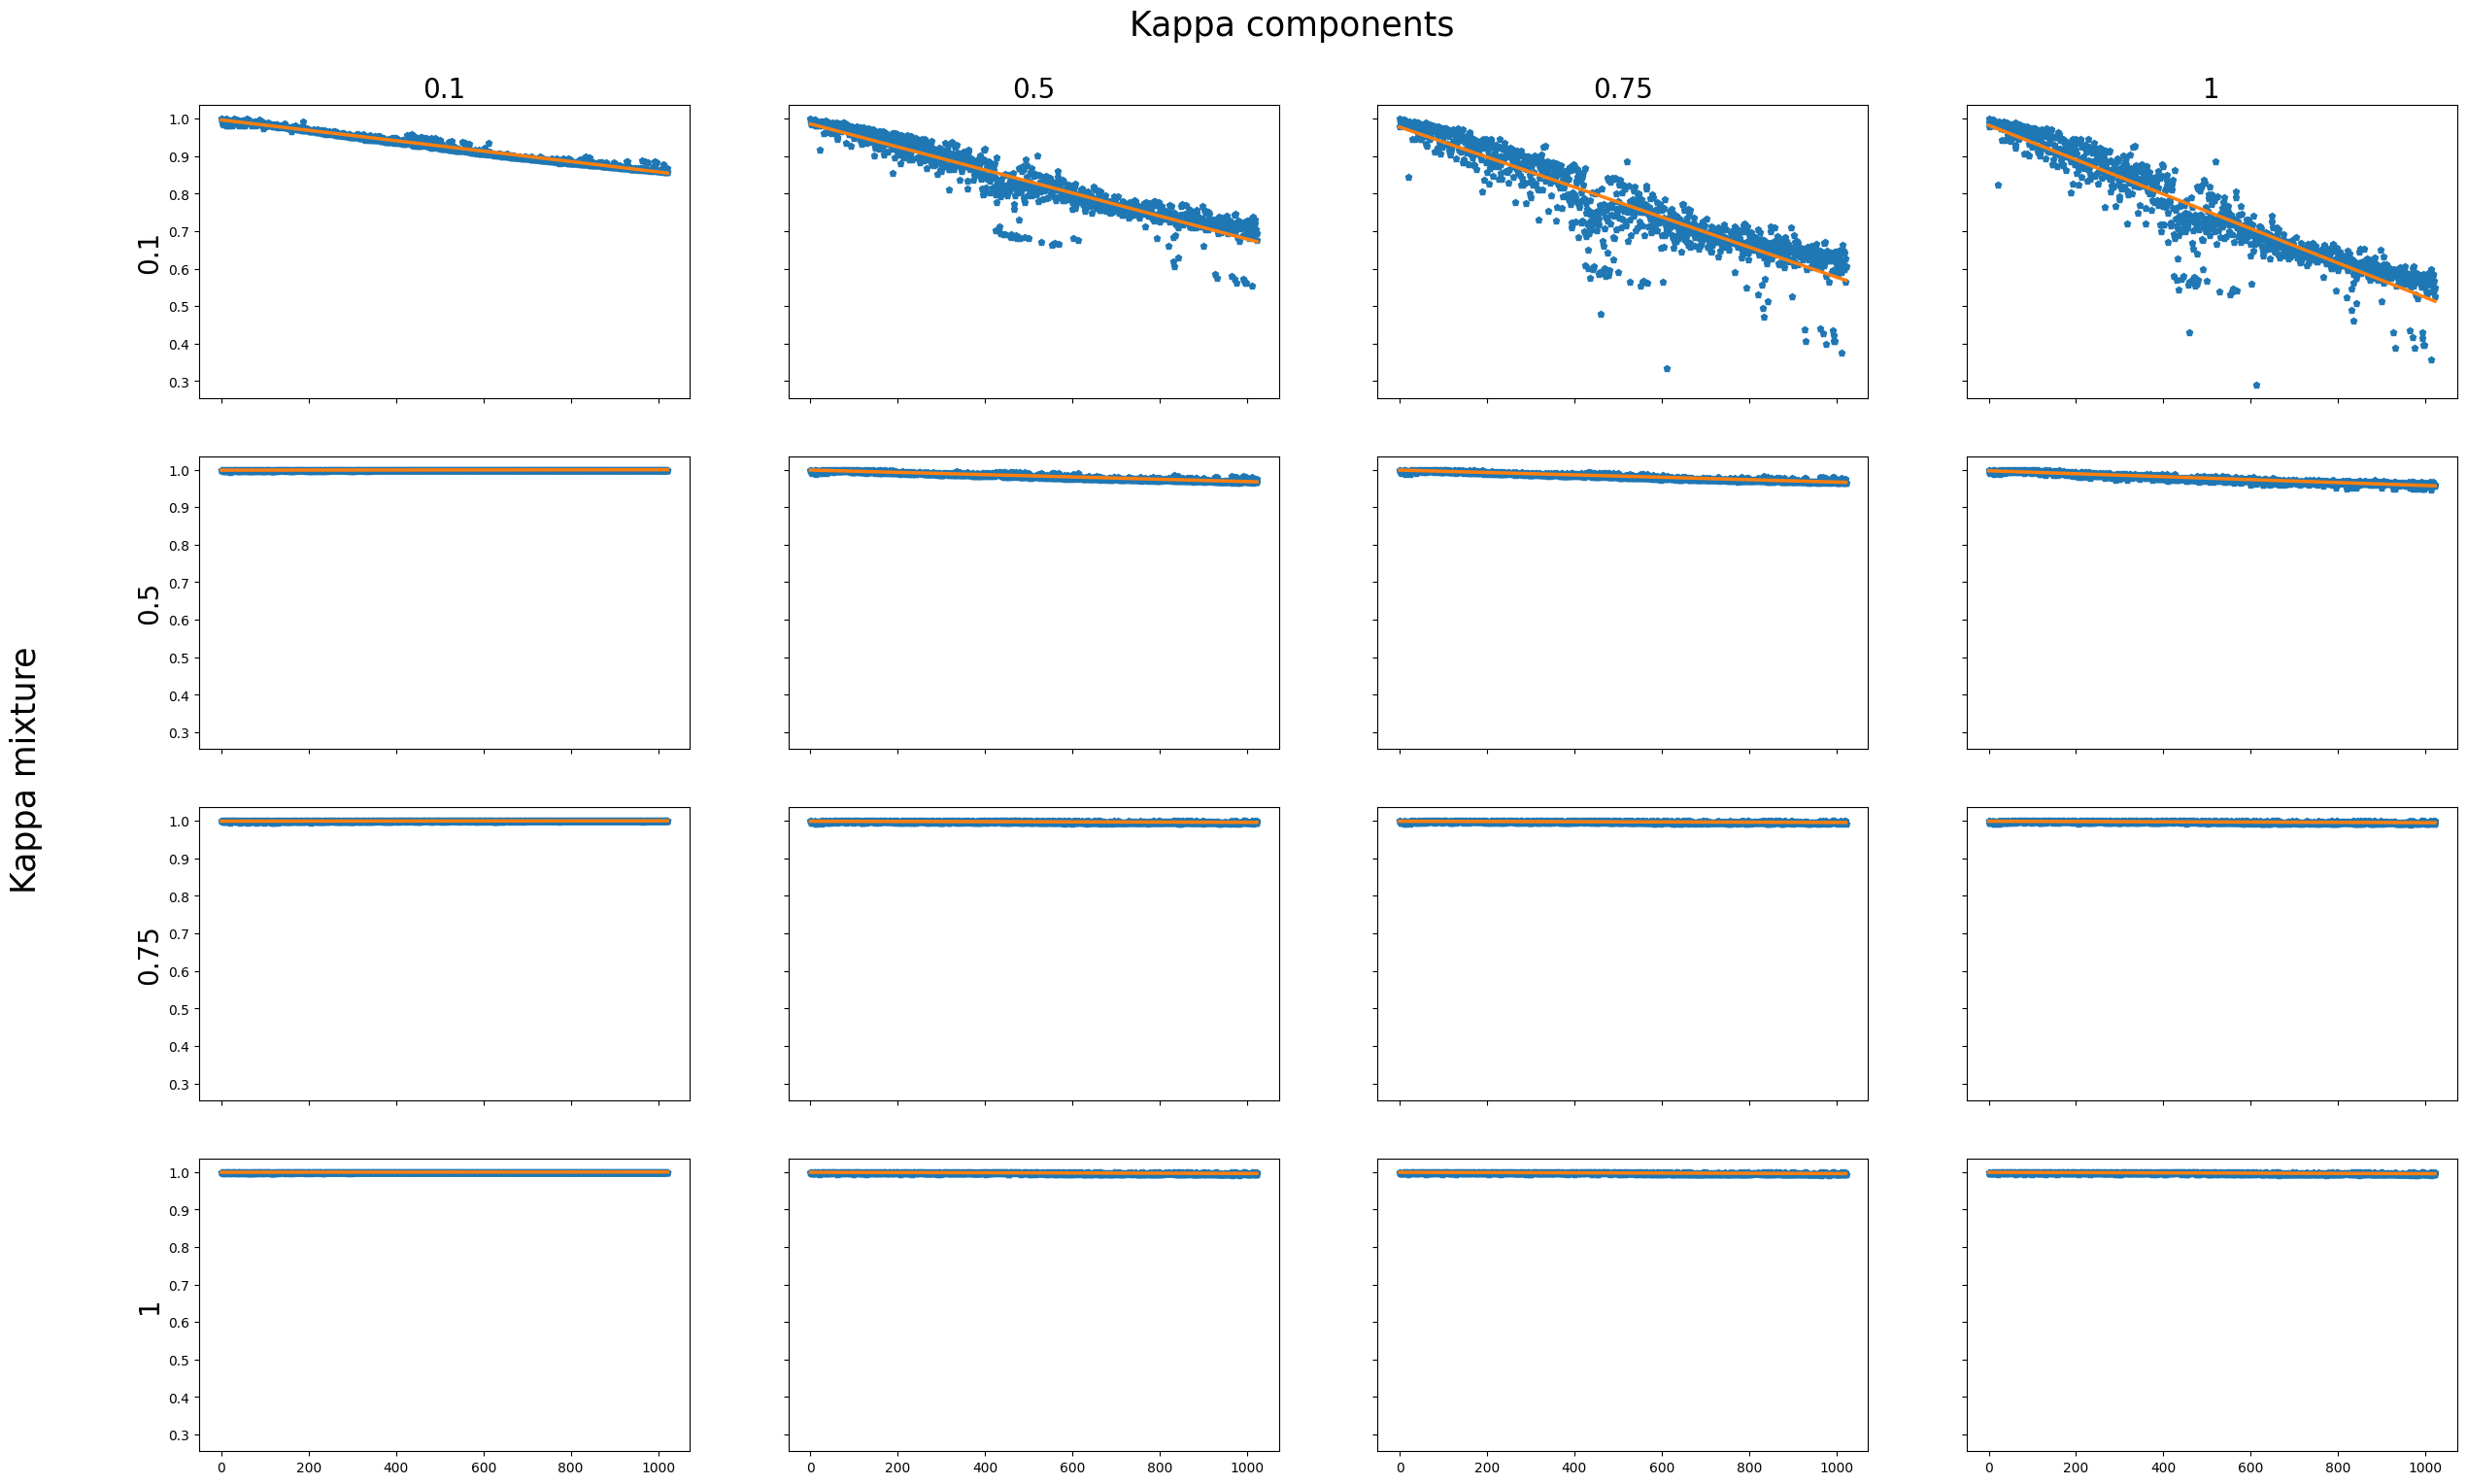

In [19]:
t = np.array(range(1,1024))
t_and_ones = np.vstack([t, np.ones(len(t))]).T

fig, axs = plt.subplots(len(all_kappas), len(all_kappas_th), sharex='all', sharey='all')
fig.set_size_inches(30, 18, forward=True)

fig.text(0.5, 0.92, 'Kappa components', ha='center', size=25)
fig.text(0.06, 0.5, 'Kappa mixture', va='center', rotation='vertical', size=25)

for i, ax in enumerate(axs):
    kappa = all_kappas[i]
    for j, axx in enumerate(ax):
        kappa_th = all_kappas_th[j]
        
        y = results_dict[(kappa, kappa_th)]
        try:
            slope, intercept = np.linalg.lstsq(t_and_ones, y)[0]
            axx.plot(range(len(y)), [prop[0] for prop in y], 'p', markersize=5)
            axx.plot(slope*t+intercept, linewidth=2.5)
        except np.linalg.LinAlgError:
            pass
        
cols = [str(kappa_th) for kappa_th in all_kappas_th]
rows = [str(kappa) for kappa in all_kappas]       

for ax, col in zip(axs[0], cols):
    ax.set_title(col, size=20)

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=90, size=20)

#### Best one

In [20]:
best_kappa = 0.1
best_kappa_th = 1

In [23]:
with open(r'/home/basia/Documents/reactions_project/results/sacharose_1000/comparing_with_first/unknown_substrats/proportions_in_times_'+str(best_kappa)+'_'+str(best_kappa_th)+'.pkl', 'rb') as f:
    y = pickle.load(f)
    y = np.array(y).reshape(-1,1)

In [24]:
t = np.array(range(1,1024))
t_and_ones = np.vstack([t, np.ones(len(t))]).T

In [25]:
slope, intercept = np.linalg.lstsq(t_and_ones, y)[0]

/tmp/ipykernel_5511/1288480160.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  slope, intercept = np.linalg.lstsq(t_and_ones, y)[0]


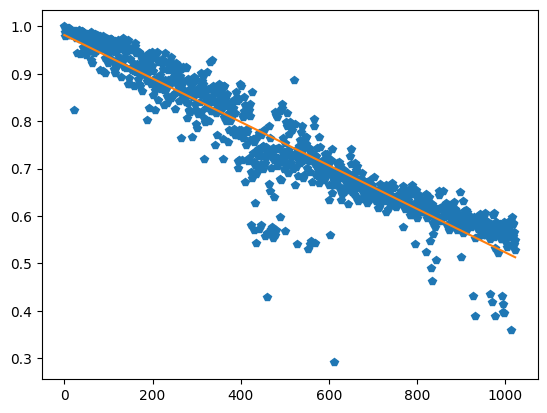

In [26]:
plt.plot(range(len(y)), [prop[0] for prop in y], 'p')
plt.plot(slope*t+intercept)

### What are these outliers???

In [27]:
y.argmin()

612

In [28]:
names = ['ppm'] + ['t' + str(nb) for nb in range(1, 1024)]
data = pd.read_csv('data/sacharose_1000/all.csv', sep = '\t').iloc[:,:-1]
data.columns = names

In [29]:
def load_spectrum(data, moment_of_time):
    ppm = data['ppm']
    intensity = data['t'+str(moment_of_time)]
    sp = NMRSpectrum(confs = list(zip(ppm, intensity)))
    return sp

In [30]:
sp_612 = load_spectrum(data, 612)

sp_611 = load_spectrum(data, 611)
sp_613 = load_spectrum(data, 613)

In [31]:
%matplotlib notebook

In [32]:
y[612]

array([0.29097811])

In [33]:
y[611]

array([0.67319229])

In [34]:
y[613]

array([0.68860124])

<IPython.core.display.Javascript object>


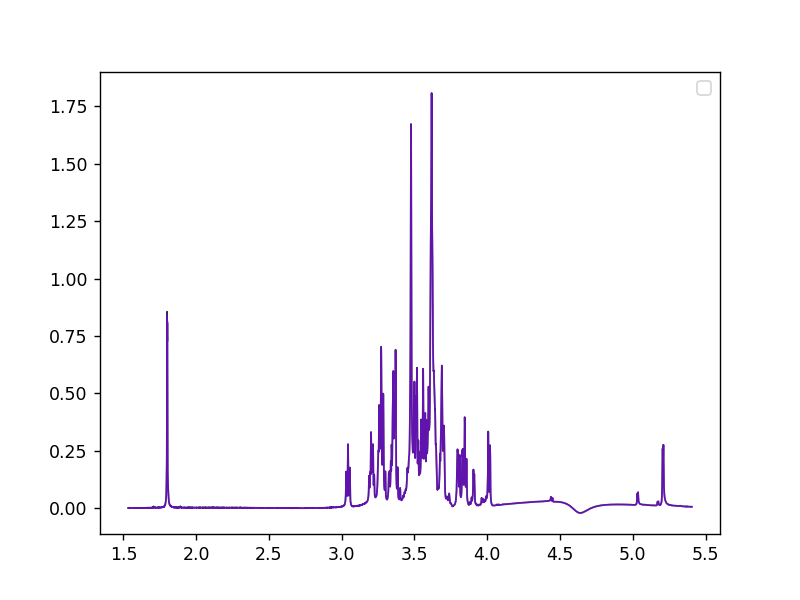

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [35]:
NMRSpectrum.plot_all([sp_611, sp_612], profile=True)